In [1]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

from utils.utils_synthesis.synthesis_feature_transformation import FeatureTransformation
from utils.utils_synthesis.synthesis_predictor import Predictor
from utils.utils_synthesis.synthesis_optimizer import Optimization
from utils.utils_common.activator import Activation

import pandas as pd

Specifying all paths and constants

In [2]:
DATASET_PATH = './dataset/data_synthesis/synthesis_data.csv'
MINIMAL_MODEL_PATH = './model/model_synthesis/synthesis_minimal.hdf5'
PRE_CHAIN_SMILES_PATH = './dataset/data_synthesis/pre_chain_smiles.json'
AMINO_ACID_SMILES_PATH = './dataset/data_synthesis/amino_acid_smiles.json'
TRANSFORMATION_FUNCTIONS_PATH = './dataset/data_synthesis/transformation_function.pkl'
SCALING_FUNCTIONS_PATH = './dataset/data_synthesis/scaling_function.pkl'

FP_RADIUS = 3
FP_BITS = 128
SEQ_MAX = 50

MODEL_TYPE = 'complete'

#### Loading and Feature Transformation
Loads the data from a given *.csv file and transforms the features for training using the model <br>
Allows for specification of custom features and data types (categorical, continuous)<br>
Saves feature_transformation and scaling functions for ease of access during validation/prediction

In [3]:
synthesis_data = pd.read_csv(DATASET_PATH)

In [4]:
feature_transformation = FeatureTransformation(
    pre_chain_smiles_path = PRE_CHAIN_SMILES_PATH,
    amino_acid_smiles_path = AMINO_ACID_SMILES_PATH,
    model_type = MODEL_TYPE)

In [5]:
nnX, nnY = feature_transformation.scale_transform(synthesis_data)

#### Training of model
Trains the model using transformed features and scaled labels <br>
Loads optimized hyperparameters and allows for custom parameters <br>
Saves checkpoints and trained models

In [6]:
predictor = Predictor(MODEL_TYPE)

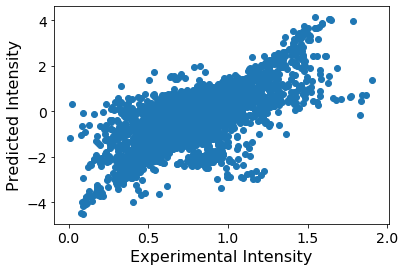

In [13]:
predictor.train(nnX, nnY)

#### Gradient activation analysis
Allows for analysis of residues and positions which contribute the most to aggregation.

In [14]:
# Sequence for demonstration

pre_chain = 'RQIKIWFQNRRMKWK' # From C-terminus to N-terminus
next_amino_acid = 'K'

In [15]:
activator = Activation(
    mode = 'synthesis',
    model_path = MINIMAL_MODEL_PATH,
    fp_radius = FP_RADIUS,
    fp_bits = FP_BITS,
    seq_max = SEQ_MAX,
    pre_chain_smiles_path = PRE_CHAIN_SMILES_PATH,
    amino_acid_smiles_path = AMINO_ACID_SMILES_PATH,
    transformation_functions_path = TRANSFORMATION_FUNCTIONS_PATH,
    scaling_functions_path = SCALING_FUNCTIONS_PATH
)

Positive activation for feature map


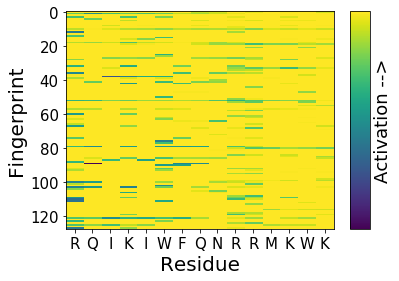

Positive activation averaged over residues


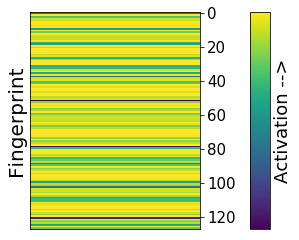

Positive activation averaged over fingerprints


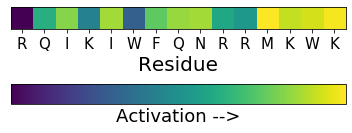

In [16]:
activator.analyze(pre_chain + next_amino_acid)

#### Optimization
Optimizes a given sequence to reduce aggregation

In [58]:
# Sequence for demonstration

pre_chain = 'RQIKIWFQNRRMKWK' # From C-terminus to N-terminus
next_amino_acid = 'K'

In [53]:
optimize = Optimization(
    model_path = MINIMAL_MODEL_PATH,
    fp_radius = FP_RADIUS,
    fp_bits = FP_BITS,
    seq_max = SEQ_MAX,
    pre_chain_smiles_path = PRE_CHAIN_SMILES_PATH,
    amino_acid_smiles_path = AMINO_ACID_SMILES_PATH,
    transformation_functions_path = TRANSFORMATION_FUNCTIONS_PATH,
    scaling_functions_path = SCALING_FUNCTIONS_PATH
)

In [54]:
df_optimize = optimize.optimize(pre_chain + next_amino_acid)

In [56]:
# Difference in wild-type sequence
df_optimize[df_optimize['Mutation'] == 'WT']

,Mutant C-> N,Mutation,Difference
164,RQIKIWFQNRRMKWK,WT,0.32422


In [57]:
# Difference in single-point mutants
df_optimize.head()

,Mutant C-> N,Mutation,Difference
0,RQIKICFQNRRMKWK,W10C,-0.402174
1,CQIKIWFQNRRMKWK,R15C,-0.395359
2,RQIKITFQNRRMKWK,W10T,-0.382642
3,RQIKIWFQNRRHKWK,M4H,-0.365940
4,RQCKIWFQNRRMKWK,I13C,-0.358894
